# Aula 7: Classificação - Árvores e avaliação

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

### Exercícios de fixação

3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare os resultados para os métodos vistos nessa aula.

Vamos inicialmente ler os dados:

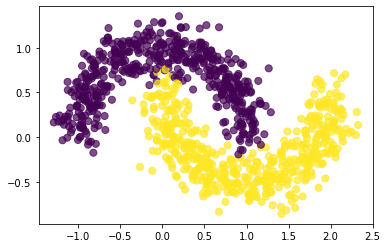

In [1]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.15)

# definindo os atributos e target
X = data[0]
y = data[1]

# plota os dados
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Construímos as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

In [2]:
print('data:', type(data), '\nX::', type(X), '\ny:', type(y))

data: <class 'tuple'> 
X:: <class 'numpy.ndarray'> 
y: <class 'numpy.ndarray'>


Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [3]:
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

A partir desse conjunto de dados, podemos realizar a classificação.

## Árvores de decisão

Árvores de decisão podem ser construidas de diferentes formas, considerando diferentes métodos e medidas, como vimos na aula. Vamos incialmente construir a árvore usando o critério Gini:

In [4]:
from sklearn import tree
# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
# Ajusta o modelo usando os dados de treinamento
model.fit(x_train,y_train)
# realizar a predição
y_pred = model.predict(x_test) 

Usando a medida de acurácia, avaliamos o desempenho do modelo no aprendizado.

In [5]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.97


Podemos visualizar a árvore.

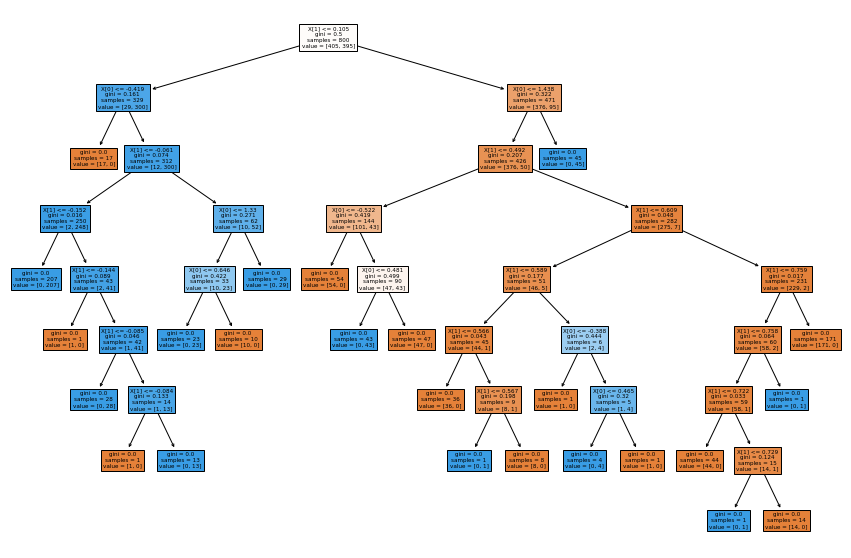

In [6]:

plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

Se usarmos a medida de entropia:

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score

model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.975


Mostrando a respectiva árvore.

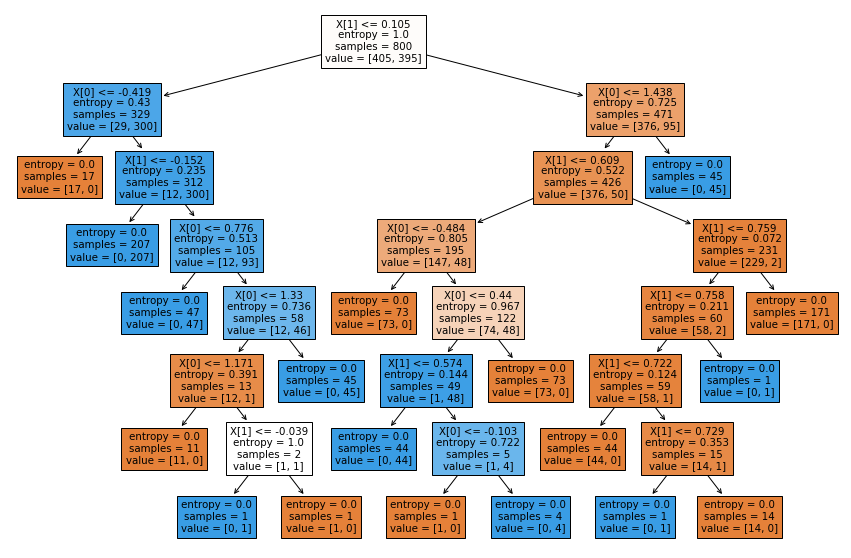

In [8]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train), filled=True) 
plt.show(True)

Podemos também limitar o tamanho da árvore, o que influencia no resultado:

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

# cria o modelo com número máximo de níveis max_depth
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
# ajusta aos dados de treinamento
model.fit(x_train,y_train)
# faz a predição usando os dados de teste
y_pred = model.predict(x_test) 
# calcula a acurácia
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.905


Visualizando a estrutura da árvore, vemos que há menos níveis do que a anterior.

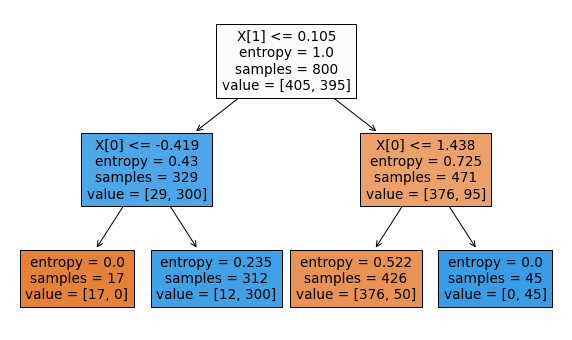

In [10]:
plt.figure(figsize=(10,6))
tree.plot_tree(model.fit(x_train,y_train),filled=True) 
plt.show(True)

Veja a implementação original e estude os parâmetros do modelo: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Florestas aleatórias

O método florestas aleatórias considera amostragem de observações e atributos. Vamos realizar a classificação.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.98


Estudo os atributos do método: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Podemos analisar como o número de árvores influencia no resultado.

Number of Estimators: 1 Accuracy: 0.96
Number of Estimators: 11 Accuracy: 0.975
Number of Estimators: 21 Accuracy: 0.98
Number of Estimators: 31 Accuracy: 0.98
Number of Estimators: 41 Accuracy: 0.985
Number of Estimators: 51 Accuracy: 0.985
Number of Estimators: 61 Accuracy: 0.985
Number of Estimators: 71 Accuracy: 0.985
Number of Estimators: 81 Accuracy: 0.985
Number of Estimators: 91 Accuracy: 0.985
Melhor n: 41  com acurácia: 0.985


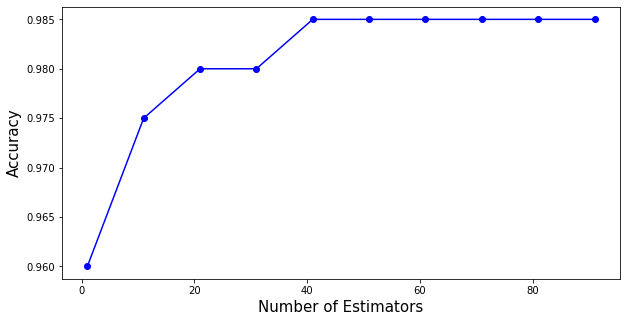

In [12]:
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

O algoritmo radom forest permite ainda quantificar a importância de cada variável na classificação. Quanto maior esse valor, mais o atributo influencia na classificação. Vejam que a soma dos pesos é igual a um.

C:\Users\joaop\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


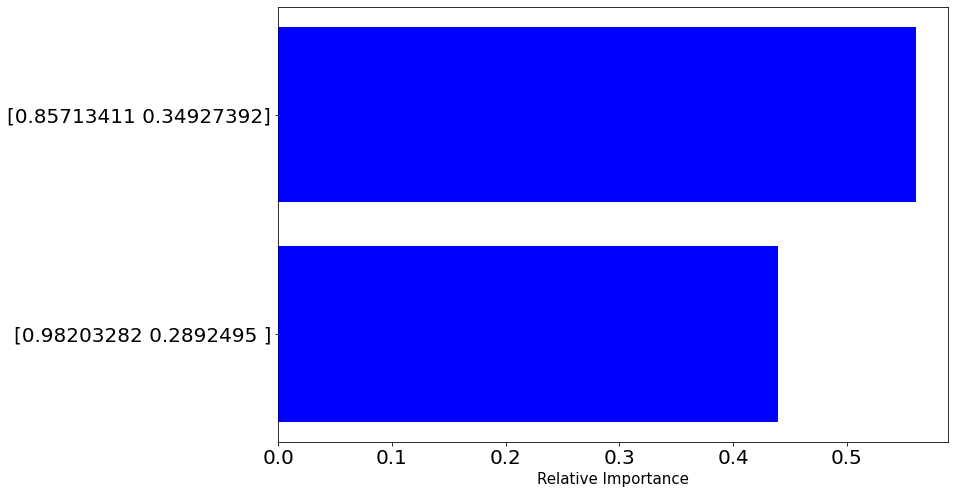

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
features_names = X
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

Com isso, podemos fazer uma ordenação dos atributos e selecionar apenas os mais importantes.

## Avaliação de classificadores

Para o modelo Florestas Aleatórias:

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)
pd.crosstab(y_pred, y_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,1,94
1,2,104,106
All,95,105,200


In [15]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_pred, y_test))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.985
F1 score: 0.9849544873241556
Precision: 0.9852468887996788
Recall: 0.9847117794486215

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.98      0.99      0.99       105

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

